In [8]:
'''
An imputation method based on ranking and nearest neighbor.
    
Beretta L, Santaniello A. Nearest neighbor imputation algorithms: a critical
evaluation. BMC Med Inform Decis Mak. 2016 Jul 25;16 Suppl 3:74.
'''
#Author: Lorenzo Beretta, lorberimm@hotmail.com

#Adapted by L Kahn; 11/20/18

#Dependencies Installation
#pip install rkNN-imputer, pip install sk-rebate

In [2]:
#How it works using a dummy array

import numpy as np
import pandas as pd
from rkNN_imputer.rkNN import rkNN

dummy = np.array ((["0.2", "0.4", "5", "0.4", "6"],
                ["?", "0.4", "8", "0.5", "8"],
                ["0.1", "0.8", "3", "0.2", "6"],
                ["0.3", "0.2", "?", "0.1", "7"],
                ["0.2", "0.9", "3", "0.2", "4"]))

imp = rkNN ()
imp.fit (dummy)
imputed_dummy = imp.transform (dummy)

# show orignal and imputed dataset
print (dummy)
print ("")
print (imputed_dummy)

None
None
[['0.2' '0.4' '5' '0.4' '6']
 ['?' '0.4' '8' '0.5' '8']
 ['0.1' '0.8' '3' '0.2' '6']
 ['0.3' '0.2' '?' '0.1' '7']
 ['0.2' '0.9' '3' '0.2' '4']]

[[0.2 0.4 5.  0.4 6. ]
 [0.1 0.4 8.  0.5 8. ]
 [0.1 0.8 3.  0.2 6. ]
 [0.3 0.2 4.  0.1 7. ]
 [0.2 0.9 3.  0.2 4. ]]


In [3]:
#Now let's try it with real data

#Import Coffee Rust Data

#1584 weekly observations from Brasil from January 1, 1991-July 30, 2018
#Missing 48% of rust data 
#Use kNN imputation to fill in this missing data 

#Data Acquisition described at: https://github.com/thedatalass.
df = pd.read_csv("Coffee-Rust.csv")
df.head()

,Date,temp,rain,production,futures,rust
0,12/1/1993,25.7498,208.841,2347.25,0.7865,0.00
1,12/8/1993,25.7498,208.841,2347.25,0.7715,0.00
2,12/15/1993,25.7498,208.841,2347.25,0.7980,0.00
3,12/22/1993,25.7498,208.841,2347.25,0.7630,0.00
4,12/29/1993,25.7498,208.841,2347.25,0.7490,0.00


In [4]:
#Delete date column
brasil = df.drop(df.columns[0], axis=1)

In [5]:
#Convert pandas dataframe as numpy array
array = brasil.values
array

array([[25.7498, 208.84099999999998, 2347.25, 0.7865, '0.00'],
       [25.7498, 208.84099999999998, 2347.25, 0.7715, '0.00'],
       [25.7498, 208.84099999999998, 2347.25, 0.7979999999999999, '0.00'],
       ...,
       [24.7691, 6.0, 5000.0, 1.103, '?'],
       [24.7691, 6.0, 5000.0, 1.1165, '?'],
       [24.7691, 6.0, 5000.0, 1.114, '?']], dtype=object)

In [7]:
import numpy as np
from rkNN_imputer.rkNN import rkNN

imp = rkNN ()
imp.fit (array)
imputed_array = imp.transform (array)

# show orignal and imputed dataset
print (array)
print ("")
print (imputed_array)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [8]:
#Let's look at just the array
imputed_array

array([[2.57498000e+01, 2.08841000e+02, 2.34725000e+03, 7.86500000e-01,
        0.00000000e+00],
       [2.57498000e+01, 2.08841000e+02, 2.34725000e+03, 7.71500000e-01,
        0.00000000e+00],
       [2.57498000e+01, 2.08841000e+02, 2.34725000e+03, 7.98000000e-01,
        0.00000000e+00],
       ...,
       [2.47691000e+01, 6.00000000e+00, 5.00000000e+03, 1.10300000e+00,
        2.56666667e+01],
       [2.47691000e+01, 6.00000000e+00, 5.00000000e+03, 1.11650000e+00,
        2.84057971e+01],
       [2.47691000e+01, 6.00000000e+00, 5.00000000e+03, 1.11400000e+00,
        2.56666667e+01]])

In [9]:
imputed_array.shape

(1584, 5)

In [10]:
#Convert imputed values back to pandas dataframe

#Code adapted from https://www.ritchieng.com/creating-dataframe-from-objects/
# columns
columns_new = ['temp', 'rain','production','futures','rust']

# pass in array and columns
brasil_new = pd.DataFrame(imputed_array, columns=columns_new)
brasil_new

,temp,rain,production,futures,rust
0,25.7498,208.8410,2347.25,0.7865,0.000000
1,25.7498,208.8410,2347.25,0.7715,0.000000
2,25.7498,208.8410,2347.25,0.7980,0.000000
3,25.7498,208.8410,2347.25,0.7630,0.000000
4,25.7498,208.8410,2347.25,0.7490,0.000000
5,24.2654,56.0826,2349.33,2.1160,0.000000
6,24.2654,56.0826,2349.33,1.7860,0.000000
7,24.2654,56.0826,2349.33,1.9400,0.000000
8,24.2654,56.0826,2349.33,1.8275,0.000000
9,24.2654,56.0826,2349.33,2.1116,0.000000


Code to combine date from 'df' dataframe with 'brasil_new' dataframe

brasil_new['Date']=df.sum(axis=1)

In [11]:
#But do we need the date for our models???

#EXPLORATORY DATA ANALYSIS

#CMD - pip install pytz, pip install pandas, pip install matplotlib, pip install numpy
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [38]:
#Basic statistics - Note we added ? values to any rust > 50
brasil_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,1584.0,25.535762,0.975633,22.8491,24.7720,25.7505,26.20360,27.3725
rain,1584.0,144.498528,69.670390,6.0000,75.5808,141.8400,203.72700,292.0630
production,1584.0,3390.330928,935.568940,1505.0000,2433.0800,3273.4200,4250.00000,5000.0000
futures,1584.0,1.218709,0.481500,0.4250,0.8525,1.1815,1.43675,3.1480
rust,1584.0,14.732570,12.765871,0.0000,3.0000,13.4000,20.00000,50.0000


Text(0.5,1,'Exploring Coffee Rust, Production and Futures')

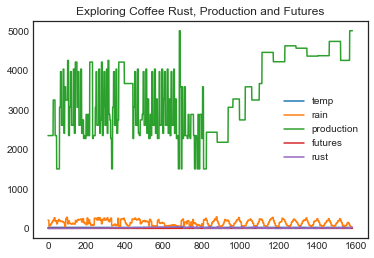

In [39]:
brasil_new.plot();
plt.title("Exploring Coffee Rust, Production and Futures")

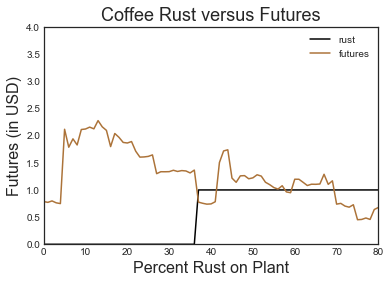

In [41]:
brasil_new['rust'].plot(color='black')
brasil_new['futures'].plot(color='#ac7339')
#Set x-axis range from 0-50
plt.xlim(0,80)
plt.ylim(0,4)
#Add xaxis label
plt.xlabel("Percent Rust on Plant", fontsize=16)
#Add yaxis label
plt.ylabel("Futures (in USD)", fontsize=16)
plt.title("Coffee Rust versus Futures", fontsize=18)
plt.legend()

C:\Users\lkahn\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Coffee Rust Histogram')

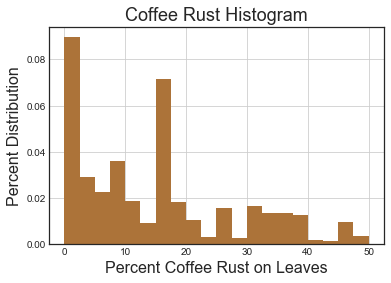

In [42]:
#Histogram of Coffee Rust
brasil_new['rust'].hist(bins=20, normed=True, color='#ac7339')
plt.xlabel("Percent Coffee Rust on Leaves",fontsize=16)
plt.ylabel("Percent Distribution",fontsize=16)
plt.title("Coffee Rust Histogram",fontsize=18)

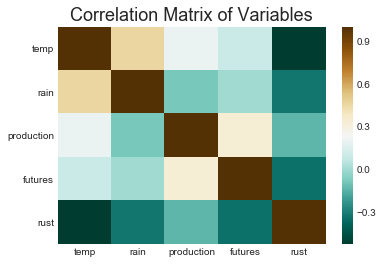

In [43]:
import seaborn as sns
ax = plt.axes()
corr = brasil_new.corr()
#The default colors were changed to 'BrBG_r' to match better with the 
#browns in the other visualizations.
sns.heatmap(corr, cmap='BrBG_r',xticklabels=corr.columns.values, yticklabels=corr.columns.values)
#Label title
ax.set_title('Correlation Matrix of Variables',fontsize=18)
plt.show()

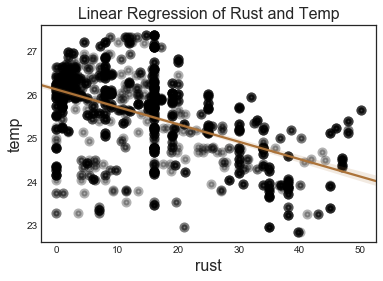

In [44]:
#Next, we could use Seaborn library for regression visualization of Rust versus Production
ax = plt.axes()
ax.set_title('Linear Regression of Rust and Temp',fontsize=16)
ax.set_xlabel('Percent Rust on Plant',fontsize=16)
ax.set_ylabel('Production in 1000-60kg bags',fontsize=16)
sns.regplot(x=brasil_new['rust'],color='#ac7339', y=brasil_new['temp'],scatter_kws={"color":"black","alpha":0.3,"lw":4} )
plt.show()

In [14]:
#Let's use a pivot table to group the data by Rust percent.
pivot_df = brasil_new.pivot_table(index=['rust'])
pivot_df.head()

,futures,production,rain,temp
rust,,,,
0.000000,2.000874,3434.275385,130.456282,25.442776
0.166667,1.816250,4452.330000,112.547000,26.642000
0.333333,1.429000,4730.330000,195.832000,26.397100
0.400000,1.444750,4544.290000,195.832000,26.397100
0.500000,1.425000,4558.170000,169.603000,25.717300


In [15]:
#Let's see error and slope of each variable
import numpy as np
coefficients, residuals, _, _, _ = np.polyfit(range(len(pivot_df.index)),pivot_df,1,full=True)
mse = residuals[0]/(len(pivot_df.index))
nrmse = np.sqrt(mse)/(pivot_df.max() - pivot_df.min())

#Print results
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope [-2.51786375e-03 -3.55573121e+00 -5.14376898e-01 -1.02669507e-02]
NRMSE: futures       0.169462
production    0.000114
rain          0.001455
temp          0.087758
dtype: float64


Now that we've done some EDA, let's try a multiperceptron neural network

In [16]:
#Let's look at the data again
brasil_new.tail()

,temp,rain,production,futures,rust
1579,24.7691,6.0,5000.0,1.1165,28.405797
1580,24.7691,6.0,5000.0,1.1505,29.809524
1581,24.7691,6.0,5000.0,1.1030,25.666667
1582,24.7691,6.0,5000.0,1.1165,28.405797
1583,24.7691,6.0,5000.0,1.1140,25.666667


In [51]:
#Note in version 0.20 change syntax 'from sklearn.cross_validation import train_test_split' to
#'from sklearn.model_selection import train_test_split'

from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation
import sklearn.metrics as metrics

#Define X, Y variables. 

#OLD CODE
#X = brasil_new.iloc[:, 0:4].values
#y = brasil_new.iloc[:, 4].values

X = brasil_new.drop('rust',axis=1)
y = brasil_new['rust']

In [48]:
#Let's split the variables into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [53]:
# Next we need to do Feature Scaling since we have continuous variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Great Tutorials on implementing NN: https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

In [23]:
#Let's try a Multilayer perceptron NN classifier because why not?

from sklearn.neural_network import MLPRegressor
#Create MLP model with 4 neurons and 4 layers. 
#Chose 4 since that's the number of features.
#Do we need this many neurons for a low mean log loss?

mlp= MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(4,4,4,4), random_state=1,max_iter=1500)

In [24]:
#Fit training data to model
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 4, 4, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [54]:
predictions = mlp.predict(X_test)

In [57]:
y_true = y_test
y_pred = predictions

In [66]:
#Since this is a regression problem, let's use MSE for model measurement
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true, y_pred)

print ('MSE MLP:', MSE)

MSE MLP: 56.86171519884505


In [79]:
#Let's compare to Logistic Regression as baseline

#DATA PREPROCESSING

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [80]:
y_train.dtype

dtype('float64')

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Fit a Logistic Regression model to the data
logistic = LogisticRegression()
logistic.fit(X_train, encoded)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, logistic.predict(X_test))
print ('MSE Logistic Regression:', MSE)

MSE Logistic Regression: 7155.292927922439


Smaller MSE for Multi-layer perceptron so this is a good starting place on model selection.